![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadística
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
! pip install scipy

In [138]:
from scipy import stats

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [32]:
df = pd.read_csv(r"C:\Users\rafam\OneDrive\Documentos\GitHub\2405_dsft_thebridge\1_Data_Analysis\2-Pandas\Practica\6-Beers\data\datasets_beers.csv", delimiter= ',')

df

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...,...
2405,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [44]:
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [45]:
df.columns

Index(['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces'], dtype='object')

In [ ]:
# 2 dimensiones

## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [35]:
df.drop('Unnamed: 0', axis=1, inplace= True)

df


,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

# tiene 2410 filas y 7 columnas

In [38]:
df.shape

(2410, 7)

## Ejercicio 5
¿De qué tipo son los datos?

In [40]:
df.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [ ]:
# 3 son de tipo float, 2 son enteros y dos son objetos

## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [43]:
df.describe(include= [np.number])

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


In [ ]:
# la columna ibu tiene cerca de la mitad de observaciones que el resto

## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [49]:
df['style'].value_counts(normalize= True)

style
American IPA                      0.176299
American Pale Ale (APA)           0.101871
American Amber / Red Ale          0.055301
American Blonde Ale               0.044906
American Double / Imperial IPA    0.043659
                                    ...   
American Malt Liquor              0.000416
Wheat Ale                         0.000416
Flanders Red Ale                  0.000416
Kristalweizen                     0.000416
Low Alcohol Beer                  0.000416
Name: proportion, Length: 99, dtype: float64

In [ ]:
# hay 99 tipos de birras, siendo las más numerosas American IPA (18%), American Pale Ale (APA) (10%) y American Amber / Red Ale (6%)

## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [100]:
df.iloc[10:20, 3:]

,name,style,brewery_id,ounces
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0
19,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [101]:
ejer_8= np.array(df.loc[10:20, ['abv', 'ibu', 'ounces']])

In [102]:
ejer_8

array([[ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [107]:
df['ounces'].value_counts(normalize= True)

ounces
12.0    0.632780
16.0    0.348963
24.0    0.009129
19.2    0.006224
32.0    0.002075
8.4     0.000415
16.9    0.000415
Name: proportion, dtype: float64

In [108]:
df['ounces'].sum()

32757.3

In [ ]:
# En total pesan cerca de 33.000 onzas. 
# El 63% de las birras pesan 12 onzas y el 35% pesan 16 oz. El peso del 2% restante oscila entre las 8.4 y las 32 onzas.

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [109]:
df['ibu'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: ibu, dtype: float64

In [ ]:
# el amargor medio de las cervezas es de 43 IBUs
# el amargor maximo es de 138 IBUs
# el amargor minimo es de 4 IBUs

In [110]:
df['ibu'].argmax()

147

In [115]:
df.iloc[147]

abv                                    0.082
ibu                                    138.0
id                                       980
name               Bitter Bitch Imperial IPA
style         American Double / Imperial IPA
brewery_id                               374
ounces                                  12.0
Name: 147, dtype: object

In [ ]:
# la cerveza de amargor maximo es la Bitter Bitch Imperial IPA, de tipo American Double / Imperial IPA.

In [111]:
df['ibu'].argmin()

106

In [116]:
df.iloc[106]

abv                     0.056
ibu                       4.0
id                       1350
name          Summer Solstice
style               Cream Ale
brewery_id                171
ounces                   12.0
Name: 106, dtype: object

In [ ]:
# la cerveza de amargor minimo es la Summer Solstice, de tipo Cream Ale.

## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [117]:
print("Desviacion estandar IBUs:", round(df['ibu'].std(), 2))

Desviacion estandar IBUs: 25.95


La dispersion de los valores de IBU respecto a su media se puede medir con la **desviacion estandar**. 
- La desviación estándar es un índice numérico que mide la dispersión o variabilidad de un conjunto de datos. Se puede entender como un promedio de las diferencias entre cada valor y la media. Es la **raiz cuadrada de la varianza**.
- En una distribución normal, aproximadamente el 68% de los datos caen dentro de una desviación estándar del promedio. En este caso, una desviación estándar de 26 nos indica que el 68% de los datos de la muestra se encuentran entre 16 IBUs y 74 IBUs.

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonamiento mediante un gráfico

In [120]:
df.corr(numeric_only= True)

,abv,ibu,id,brewery_id,ounces
abv,1.000000,0.670621,0.042811,-0.098632,0.172529
ibu,0.670621,1.000000,0.000485,-0.004875,0.054691
id,0.042811,0.000485,1.000000,-0.504030,0.100843
brewery_id,-0.098632,-0.004875,-0.504030,1.000000,-0.133762
ounces,0.172529,0.054691,0.100843,-0.133762,1.000000


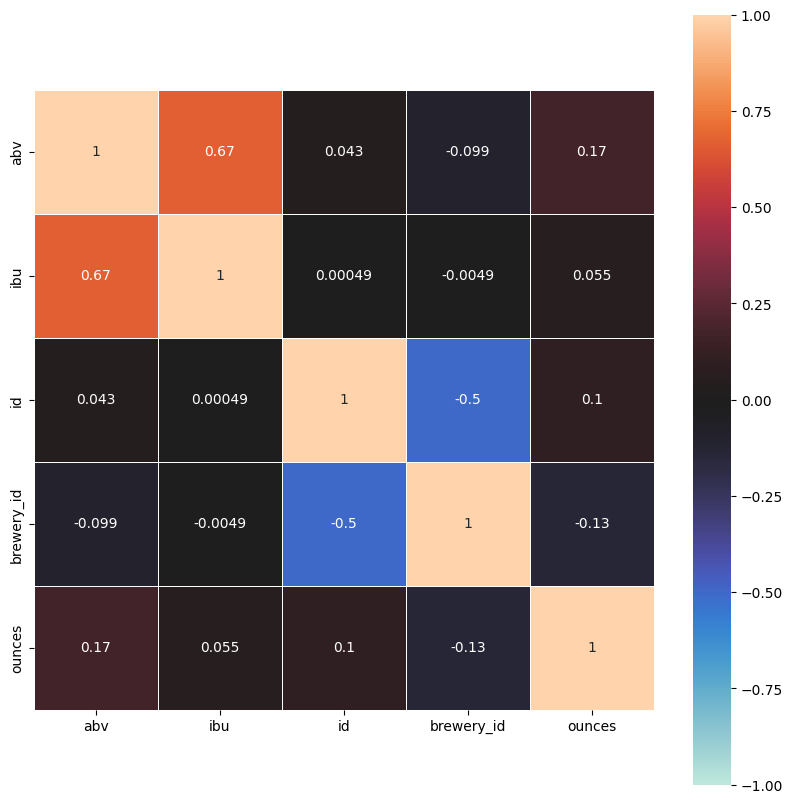

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only= True),vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, annot=True);

In [ ]:
# No parece haber ninguna relacion lineal entre las variables numericas (correlación R cercana a 0) salvo entre IBU y ABV (correlación positiva pero no muy fuerte (R=0.67)). 

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

<Axes: xlabel='abv', ylabel='Count'>

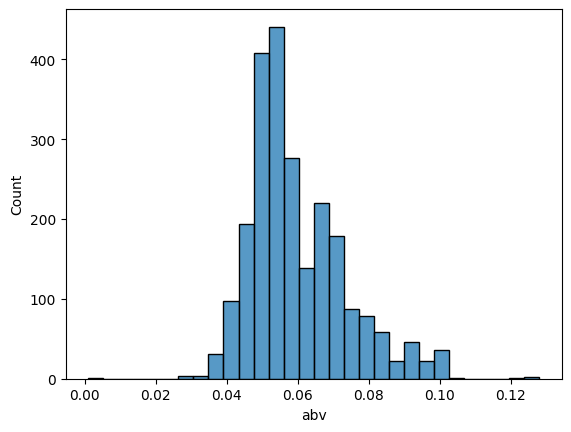

In [133]:
sns.histplot(df['abv'], bins=30)

In [158]:
df['abv'].describe()

count    2348.000000
mean        0.059773
std         0.013542
min         0.001000
25%         0.050000
50%         0.056000
75%         0.067000
max         0.128000
Name: abv, dtype: float64

In [174]:
stats.mode(df['abv'])

ModeResult(mode=0.05, count=215)

In [ ]:
# Da la impresion de que hay una ligera asimetría positiva, es decir, la cola de la distribución se alarga a la derecha para valores superiores a la media. 
# También se observa que media > mediana > moda, que suele ser un indicador de una asimetría positiva.

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

<Axes: ylabel='abv'>

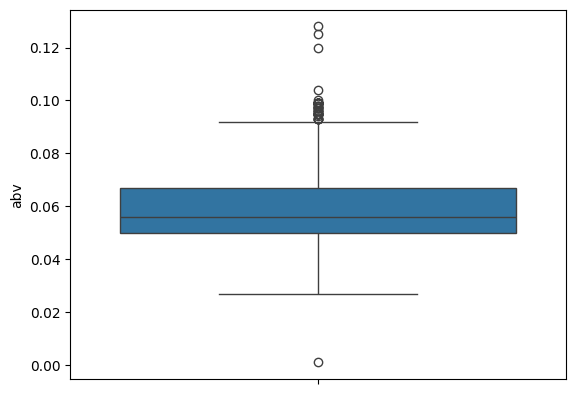

In [157]:
sns.boxplot(df['abv'])

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [180]:
df.groupby('style')['abv'].agg([np.mean]).sort_values("mean", ascending = False)

C:\Users\rafam\AppData\Local\Temp\ipykernel_37664\4047024144.py:1: FutureWarning: The provided callable <function mean at 0x000002AB569B5B20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('style')['abv'].agg([np.mean]).sort_values("mean", ascending = False)


,mean
style,
English Barleywine,0.107667
Quadrupel (Quad),0.104000
American Barleywine,0.099000
American Malt Liquor,0.099000
Russian Imperial Stout,0.097636
...,...
Berliner Weissbier,0.043909
English Dark Mild Ale,0.041500
Light Lager,0.040417


In [ ]:
# En media, los tipos de cerveza con más grados de alcohol son English Barleywine, Quadrupel (Quad) y American Barleywine.

In [181]:
df.groupby('style')['ibu'].agg([np.mean]).sort_values("mean", ascending = False)

C:\Users\rafam\AppData\Local\Temp\ipykernel_37664\3984660099.py:1: FutureWarning: The provided callable <function mean at 0x000002AB569B5B20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('style')['ibu'].agg([np.mean]).sort_values("mean", ascending = False)


,mean
style,
American Barleywine,96.00
American Double / Imperial IPA,93.32
Russian Imperial Stout,86.50
American Double / Imperial Pilsner,85.00
Belgian Strong Dark Ale,72.00
...,...
Kristalweizen,NaN
Low Alcohol Beer,NaN
Mead,NaN


In [ ]:
# En media, los tipos de cerveza más amargos son American Barleywine, American Double / Imperial IPA y Russian Imperial Stout.

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [183]:
df2 = pd.read_csv(r"C:\Users\rafam\OneDrive\Documentos\GitHub\mi_copia_dsftmayo24semana1.1\semana 2\2-Pandas\Practica\6-Beers\data\datasets_breweries.csv", delimiter= ',')

df2

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra también la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [188]:
df2.rename(columns={'Unnamed: 0': 'brewery_id', 'name': 'brewery_name'}, inplace= True)

In [189]:
df2

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 18
Junta los dos datasets que tienes

In [194]:
df3= pd.merge(df, df2, on='brewery_id')

df3

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [202]:
df3['state'].nunique()

51

In [ ]:
# Hay 51 estados diferentes en el dataset

In [203]:
df3['city'].nunique()

384

In [ ]:
# Hay 384 ciudades diferentes en el dataset

In [204]:
df3['brewery_name'].nunique()

551

In [ ]:
# Hay 551 cervecerias diferentes en el dataset

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [337]:
df3.groupby(['state', 'city'])['abv'].agg([max, np.mean, np.median]).sort_values("mean", ascending = False)

C:\Users\rafam\AppData\Local\Temp\ipykernel_37664\1383669454.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df3.groupby(['state', 'city'])['abv'].agg([max, np.mean, np.median]).sort_values("mean", ascending = False)
C:\Users\rafam\AppData\Local\Temp\ipykernel_37664\1383669454.py:1: FutureWarning: The provided callable <function mean at 0x000002AB569B5B20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df3.groupby(['state', 'city'])['abv'].agg([max, np.mean, np.median]).sort_values("mean", ascending = False)
C:\Users\rafam\AppData\Local\Temp\ipykernel_37664\1383669454.py:1: FutureWarning: The provided callable <function median at 0x000002AB56AE4E00> is currently using Serie

,,max,mean,median
state,city,,,
VA,Virginia Beach,0.088,0.088,0.088
MI,Mount Pleasant,0.082,0.082,0.082
PA,Meadville,0.092,0.081,0.077
IN,Bargersville,0.080,0.080,0.080
MA,Canton,0.080,0.080,0.080
...,...,...,...,...
FL,Tampa Bay,NaN,NaN,NaN
MI,Houghton,NaN,NaN,NaN
NE,Cortland,NaN,NaN,NaN


## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [357]:
dfIN= df3.groupby(["state"]).agg({"ibu": [max]})

dfIN

C:\Users\rafam\AppData\Local\Temp\ipykernel_37664\2661252067.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  dfIN= df3.groupby(["state"]).agg({"ibu": [max]})


,ibu
,max
state,
AK,71.0
AL,103.0
AR,39.0
AZ,99.0
CA,115.0
CO,104.0
CT,85.0
DC,115.0


In [335]:
df3[df3['state'] == 'IN'].sort_values(by='ibu', ascending=False)

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [242]:
df3.groupby('city')['ibu'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.0,135.00,135.0,135.00,135.0
Abita Springs,3.0,27.333333,21.455380,13.0,15.00,17.0,34.50,52.0
Ada,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afton,4.0,43.000000,19.899749,22.0,28.00,45.0,60.00,60.0
Airway Heights,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.0,39.75,44.0,51.00,72.0
Worcester,1.0,69.000000,NaN,69.0,69.00,69.0,69.00,69.0
Yakima,2.0,54.000000,22.627417,38.0,46.00,54.0,62.00,70.0


## Ejercicio 23
Consigue en un DataFrame de todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07. Piénsalo bien.

In [370]:
cervecerias_abv_min= pd.DataFrame(df3[df3['abv'] >0.07]['brewery_name'].unique())
cervecerias_abv_min

,0
0,18th Street Brewery
1,21st Amendment Brewery
2,450 North Brewing Company
3,7 Seas Brewing Company
4,Against The Grain Brewery
...,...
178,Wind River Brewing Company
179,Wingman Brewers
180,Wisconsin Brewing Company
181,Worthy Brewing Company


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media. Piénsalo bien.

In [399]:
media_ibu= df3['ibu'].mean()

In [400]:
df4= pd.DataFrame(df3.groupby('state')['ibu'].mean())
df4

,ibu
state,
AK,40.882353
AL,51.222222
AR,39.000000
AZ,35.208333
CA,46.281481
CO,47.431507
CT,40.833333
DC,55.250000
DE,52.000000


In [401]:
estado_amargor_encima_media= df4[df4['ibu']> media_ibu]
estado_amargor_encima_media

,ibu
state,
AL,51.222222
CA,46.281481
CO,47.431507
DC,55.250000
DE,52.000000
FL,46.756757
GA,46.285714
ID,55.117647
IN,42.989011
